# To build a model for LeNet Convolution neural network:

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
model = Sequential()
#Layer 1




In [5]:
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (225,225,3)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

In [6]:
#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

In [7]:
#Flatten
model.add(Flatten())



In [8]:
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 32, activation = 'relu'))


In [9]:
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 16, activation = 'relu'))


In [10]:
#Layer 5
#Output Layer
model.add(Dense(units = 3, activation = 'softmax'))


In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 221, 221, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 16)      2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 44944)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1438240   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(225,225),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/test',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 1448 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [16]:
img_dims = 150
epochs = 20
batch_size = 32

In [17]:
#### Fitting the model
history = model.fit_generator(
           training_set,steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/20
45/45 [==============================] - 91s 2s/step - loss: 0.8799 - accuracy: 0.6109 - val_loss: 0.4253 - val_accuracy: 0.8094
Epoch 2/20
45/45 [==============================] - 89s 2s/step - loss: 0.4913 - accuracy: 0.8157 - val_loss: 0.4071 - val_accuracy: 0.8516
Epoch 3/20
45/45 [==============================] - 88s 2s/step - loss: 0.3851 - accuracy: 0.8460 - val_loss: 0.3303 - val_accuracy: 0.8891
Epoch 4/20
45/45 [==============================] - 88s 2s/step - loss: 0.3149 - accuracy: 0.8785 - val_loss: 0.3207 - val_accuracy: 0.8867
Epoch 5/20
45/45 [==============================] - 89s 2s/step - loss: 0.3281 - accuracy: 0.8814 - val_loss: 0.7993 - val_accuracy: 0.6758
Epoch 6/20
45/45 [==============================] - 89s 2s/step - loss: 0.3128 - accuracy: 0.8891 - val_loss: 0.2508 - val_accuracy: 0.9094
Epoch 7/20
45/45 [==============================] - 87s 2s/step - loss: 0.2561 - accuracy: 0.9096 - val_loss: 0.2240 - val_accuracy: 0.9234
Epoch 8/20
45/45 [==

In [1]:
model.save('covid2.h5')

NameError: name 'model' is not defined

In [19]:
import matplotlib.pyplot as plt

In [20]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

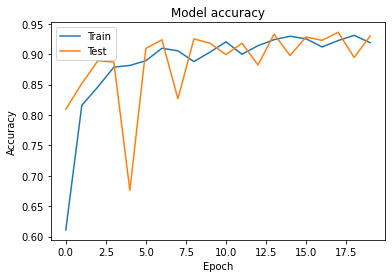

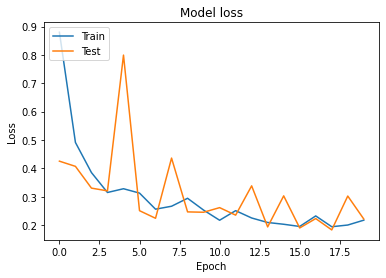

In [21]:
graph()

In [22]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
41/41 [==============================] - 27s 649ms/step - loss: 0.2205 - accuracy: 0.9301
Test Accuracy: 93.01242232322693
